In [1]:
import numpy as np
import pandas as pd
import plotly 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#cufflink is library that link pandas and plotly together 
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

from sklearn.metrics import accuracy_score

#initialize ploty
pyo.init_notebook_mode(connected=True)
cf.go_offline()

#Pandas is a high-level data manipulation tool developed by Wes McKinney.
#It is built on the Numpy package and its key data structure is called the DataFrame.
#DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables.

df=pd.read_csv(r'C:\Users\Whitechamp\Desktop\Heart-Disease-Prediction-master\heart.csv')



In [2]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [4]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
#Binary values are grouped in O and 1 category
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [6]:
#matrix size
df.shape

(303, 14)

In [7]:
#size of whole dataframe
df.size

4242

In [8]:
#numerical analysis
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#checking if there is any null character in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017376E62808>,
      dtype=object)

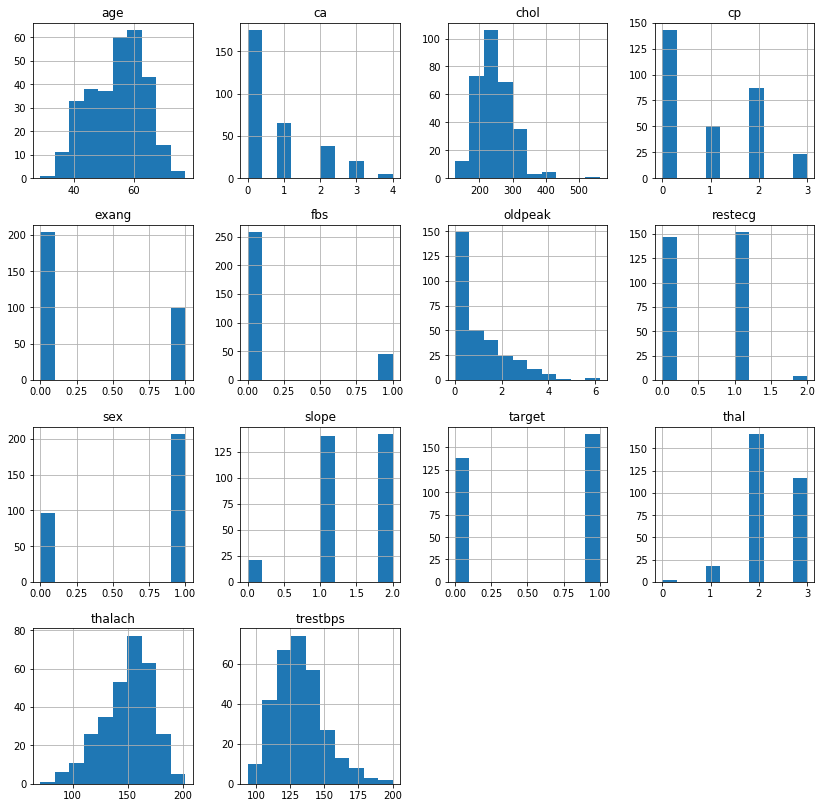

In [10]:
#visualisation

# panda built in visalisation
df.hist(figsize=(14,14))

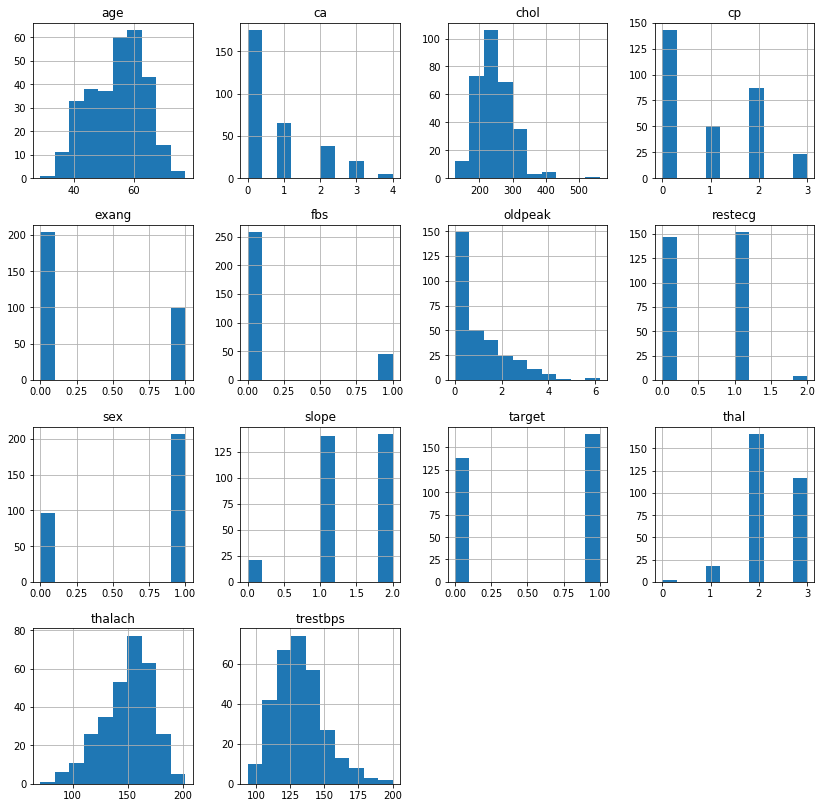

In [11]:
#to remove all the matplotlib data information and to only show graph
#on x axis it is age,ca,chol as per given info data and y is no. of tested patients
df.hist(figsize=(14,14))
plt.show()

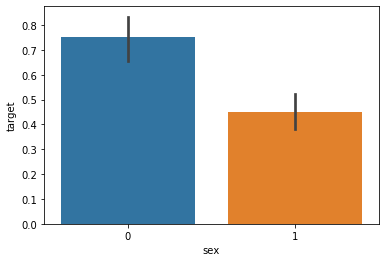

In [12]:
sns.barplot(df['sex'],df['target'])

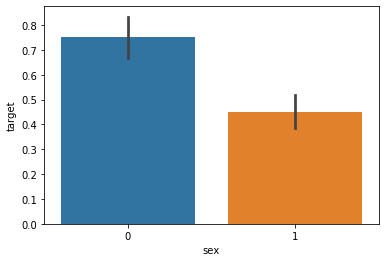

In [13]:
sns.barplot(df['sex'],df['target'])
plt.show()

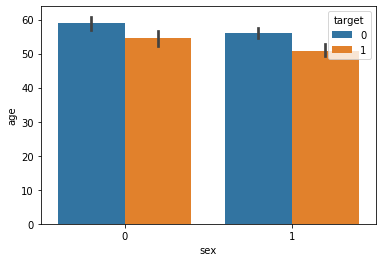

In [14]:
sns.barplot(df['sex'],df['age'],hue=df['target'])
plt.show()

In [15]:
px.bar(df,df['sex'],df['target'])

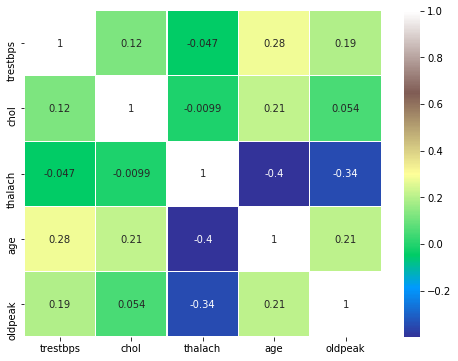

In [16]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

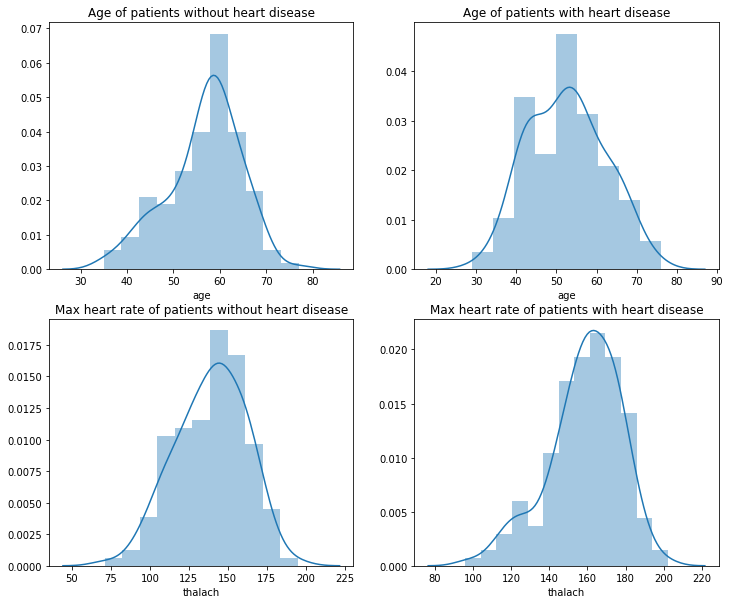

In [17]:
 #seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None,
#rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

#Flexibly plot a univariate distribution of observations.

#This function combines the matplotlib hist function (with automatic calculation of a good default bin size) 
#with the seaborn kdeplot() and rugplot() functions. 
#It can also fit scipy.stats distributions and plot the estimated PDF over the data.


#x=12,y=10
plt.figure(figsize=(12,10))
#2*2 matrix 1st graph
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()


In [18]:
#data pre-processing


In [19]:
#loc is for columns
x,y=df.loc[:,:'thal'],df.loc[:,'target']

In [20]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [54]:
#at first analyse the x then transform it
from sklearn.preprocessing import StandardScaler
std=StandardScaler().fit(x)
x_std=std.transform(x)

In [55]:
x_std

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [56]:
x_std[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
df.shape


(303, 14)

In [23]:
x.shape


(303, 13)

In [24]:
from sklearn.model_selection import train_test_split


In [58]:
#70% of data is with x train nad 30% is for testing
x_train_std,x_test_std,y_train,y_test=train_test_split(x_std,y,random_state=10,test_size=0.3,shuffle=True)

In [59]:
x_train_std.shape


(212, 13)

In [60]:
x_test_std.shape

(91, 13)

In [28]:
y_train.size

212

In [29]:
y_test.shape

(91,)

In [72]:
#model
#decision tree classifier

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=7)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [74]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [76]:
prediction=dt.predict(x_test)

In [77]:
prediction

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [78]:
accuracy_dt=accuracy_score(y_test,prediction)*100

In [79]:
#previously the accuracy was 75 but after using standard 
#scaler accuracy became 79%.standard scaler is only used for knn type problems
accuracy_dt

73.62637362637363

In [80]:
dt.feature_importances_

array([0.05327084, 0.03606916, 0.35254285, 0.08071738, 0.08332004,
       0.        , 0.        , 0.07470712, 0.0627319 , 0.07498929,
       0.0587195 , 0.11436689, 0.00856501])

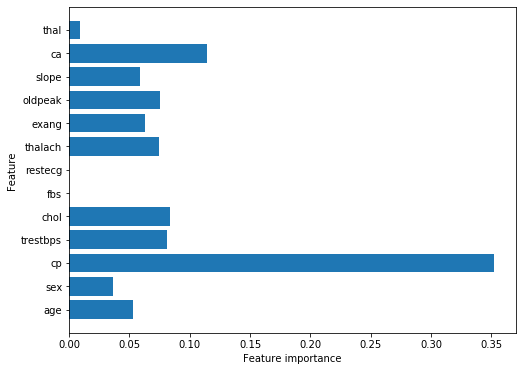

In [81]:
def plot_feature_importance(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),x)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importance(dt)


In [40]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [41]:
category=['No,you don\'t have heart disease.','Yes,you have heart disease.']

In [42]:
custom_data=np.array([[57,0,0,120,354,0,1,163,1,0.6,2,0,2]])

In [43]:
custom_data_prediction_dt=dt.predict(custom_data)

In [44]:
custom_data_prediction_dt

array([1], dtype=int64)

In [45]:
print(category[int(custom_data_prediction_dt)])

Yes,you have heart disease.


In [46]:
#KNN algorithm

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
#at first analyse the distribution of x and then transform
std=StandardScaler().fit(x)
x_std=std.transform(x)


In [49]:
x_std

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [50]:
#63,1,3,145,233,150,0,2.3,0,0 converts into this by scaler distribution done for mostly knn problems
x_std[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
#how much data you want to collect
#or how many neighbors should be there to accurately predict heart disease that's for we use n_neighbors,
#changing it,changes the accuracy of whole model
knn=KNeighborsClassifier(n_neighbors=5)
#training
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
prediction_knn=knn.predict(x_test_std)
accuracy_knn=accuracy_score(y_test,prediction)*100

In [83]:
accuracy_knn

73.62637362637363

In [85]:
custom_data_knn=np.array([[57,0,0,140,241,0,1,123,1,0.2,1,0,3]])

In [86]:
custom_data_knn_std=std.transform(custom_data_knn)

In [87]:
custom_data_knn_std

array([[ 0.29046364, -1.46841752, -0.93851463,  0.47839125, -0.10172985,
        -0.41763453,  0.89896224, -1.16528085,  1.43548113, -0.7243226 ,
        -0.64911323, -0.71442887,  1.12302895]])

In [88]:
custom_data_prediction_knn=knn.predict(custom_data_knn)

In [89]:
custom_data_prediction_knn

array([1], dtype=int64)

In [90]:
print(category[int(custom_data_prediction_knn)])

Yes,you have heart disease.


In [91]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    #accuracy sscore on the basis of k neighbors
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std,y_train)
    prediction_knn=knn.predict(X=x_test_std)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))

In [92]:
scores

{1: 0.7582417582417582,
 2: 0.8131868131868132,
 3: 0.8241758241758241,
 4: 0.8571428571428571,
 5: 0.8131868131868132,
 6: 0.8021978021978022,
 7: 0.8021978021978022,
 8: 0.8241758241758241,
 9: 0.7802197802197802,
 10: 0.7802197802197802,
 11: 0.7802197802197802,
 12: 0.7912087912087912,
 13: 0.8021978021978022,
 14: 0.8021978021978022,
 15: 0.7802197802197802,
 16: 0.7802197802197802,
 17: 0.7802197802197802,
 18: 0.7802197802197802,
 19: 0.7802197802197802,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7912087912087912,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

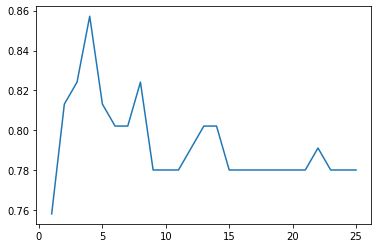

In [93]:
plt.plot(k_range,scores_list)

In [94]:
px.line(x=k_range,y=scores_list)

In [95]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]


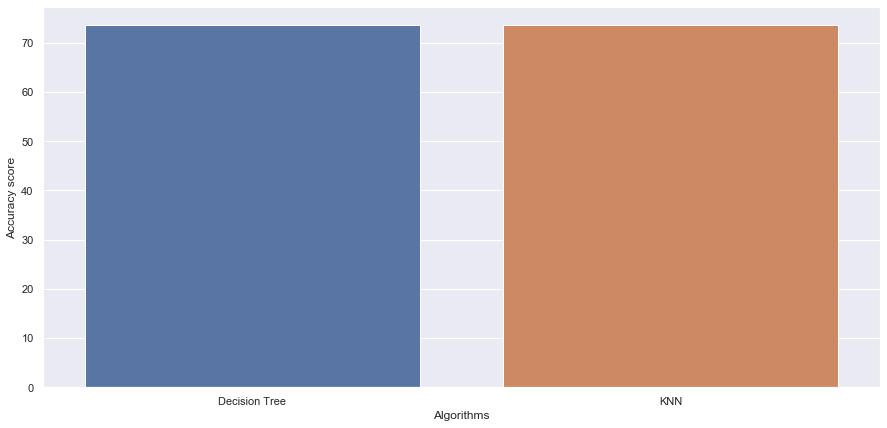

In [96]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)